In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("alzheimers_disease_data.csv")

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.drop("DoctorInCharge",inplace=True,axis=1)

In [5]:
df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

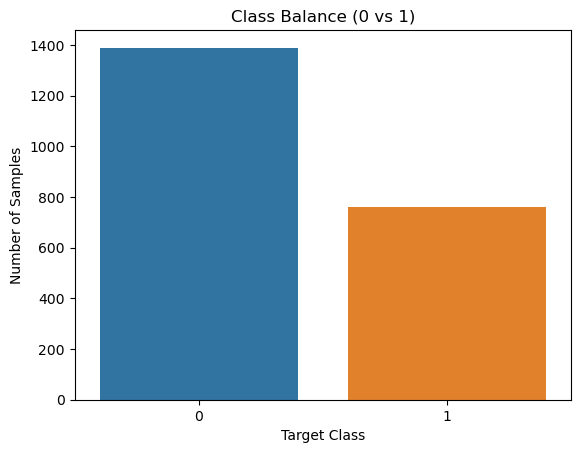

In [6]:
import seaborn as sns
sns.countplot(x='Diagnosis', data=df)
plt.title('Class Balance (0 vs 1)')
plt.xlabel('Target Class')
plt.ylabel('Number of Samples')
plt.show()

In [7]:
df['Diagnosis'].value_counts()

0    1389
1     760
Name: Diagnosis, dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']


min_max_scaler = MinMaxScaler()
df[columns] = min_max_scaler.fit_transform(df[columns])


standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])


In [9]:
cholesterol_features = ['CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']
correlation_matrix = df[cholesterol_features].corr()

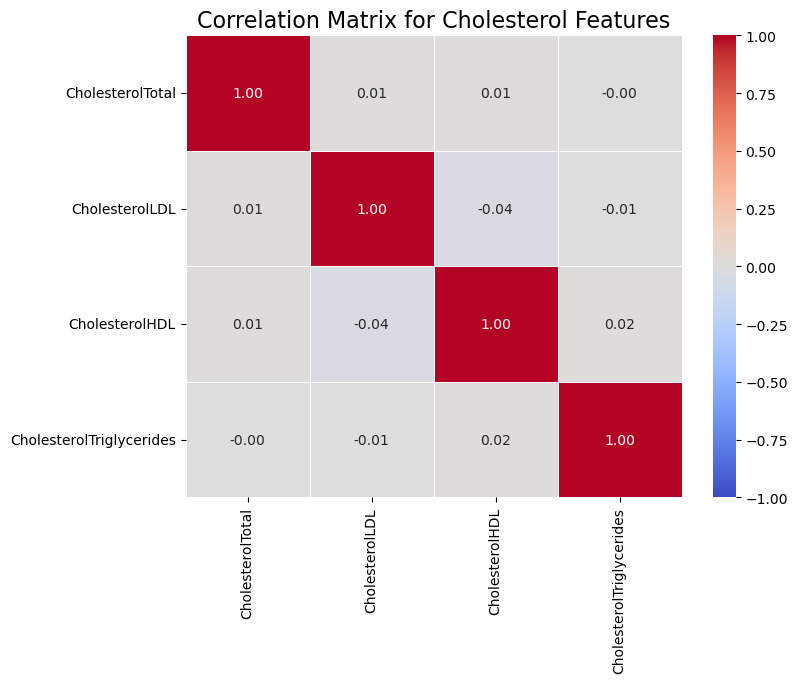

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Cholesterol Features', fontsize=16)
plt.show()

In [11]:
binary_cols = df.columns[df.nunique() <=4]
non_binary_cols = df.columns[~df.columns.isin(binary_cols)]
mean_values_non_binary = df[non_binary_cols].mean()

In [12]:
mean_values_non_binary

PatientID                   5.825000e+03
Age                        -2.083024e-16
BMI                        -2.645110e-17
AlcoholConsumption          1.934237e-16
PhysicalActivity           -1.206832e-16
DietQuality                 1.066310e-16
SleepQuality               -1.917705e-16
SystolicBP                 -2.512855e-16
DiastolicBP                 1.256427e-16
CholesterolTotal           -5.786179e-17
CholesterolLDL             -2.893089e-16
CholesterolHDL              2.198748e-16
CholesterolTriglycerides    9.919163e-17
MMSE                       -1.421747e-16
FunctionalAssessment       -1.091108e-16
ADL                         2.413663e-16
dtype: float64

In [13]:
df.dtypes



PatientID                      int64
Age                          float64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                   float64
DiastolicBP                  float64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [14]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,...,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,4752,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,...,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,4753,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,...,0.281813,0,0,0.724491,0,1,0,1,0,0
3,4754,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,...,1.343346,0,1,0.508044,0,0,0,0,0,0
4,4755,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,...,0.333665,0,0,-1.684679,0,0,1,1,0,0


In [15]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X = df.drop(columns=['Diagnosis','PatientID']) 
y = df['Diagnosis'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

In [19]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [21]:
y_pred_xgb = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
accuracy

0.9488372093023256

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
                           param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]})

In [23]:
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred_best_xgb)
accuracy

0.9511627906976744

In [25]:
from sklearn.model_selection import cross_val_score
model_cross_val= xgb.XGBClassifier()
scores = cross_val_score(model_cross_val, X, y, cv=5, scoring='accuracy')
scores.mean()

0.9482864422399306

In [26]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
}

random_search = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [27]:
random_search.best_score_

0.949967794426741

In [28]:
final_model = random_search.best_estimator_

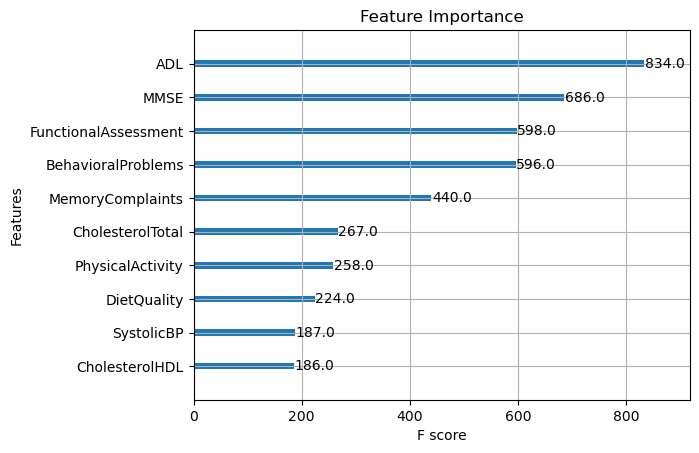

In [29]:
xgb.plot_importance(final_model.get_booster(), importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()

In [ ]:
best_rf_model_grid = grid_search.best_estimator_
y_pred_grid = best_rf_model_grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
accuracy_grid

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],               
    'max_depth': [None, 10, 20, 30, 40],                 
    'min_samples_split': [2, 5, 10, 15],                 
    'min_samples_leaf': [1, 2, 4],                       
    'bootstrap': [True, False]                           
}
rf_random = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

In [ ]:
best_rf_model_random = random_search.best_estimator_
y_pred_random = best_rf_model_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
accuracy_random

In [ ]:
import joblib

In [ ]:
joblib.dump(final_model, 'xg_boost_model.pkl')


In [ ]:
#The xgboost is the best one 

## Using  GaussianNB(As oredered)

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
GNB=GaussianNB()

In [42]:
GNB.fit(X_train,y_train)

GaussianNB()

In [44]:
GNB_preds=GNB.predict(X_test)
GNB_acc=accuracy_score(y_test,GNB_preds)
GNB_acc

0.8325581395348837

In [45]:
GNB_grid = GaussianNB()


param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid_search = GridSearchCV(GNB_grid, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [46]:
best_nb = grid_search.best_estimator_
nb_test_preds = best_nb.predict(X_test)
nb_test_accuracy = accuracy_score(y_test, nb_test_preds)
nb_test_accuracy

0.8325581395348837

In [47]:
#Same accuracy actually 